<a href="https://colab.research.google.com/github/UtkarshGupta048/Data-Analytics/blob/main/Car_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [45]:
import numpy as np
import pandas as pd

In [46]:
import matplotlib.pyplot as plt

In [47]:
import seaborn as sns

In [48]:
import warnings
warnings.filterwarnings('ignore')

In [49]:
from google.colab import files
uploaded=files.upload()

Saving quikr_car.csv to quikr_car (1).csv


In [50]:
df=pd.read_csv("quikr_car.csv")

In [51]:
df.head(10)

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,"80,000","45,000 kms",Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,"4,25,000",40 kms,Diesel
2,Maruti Suzuki Alto 800 Vxi,Maruti,2018,Ask For Price,"22,000 kms",Petrol
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,"3,25,000","28,000 kms",Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,"5,75,000","36,000 kms",Diesel
5,Ford EcoSport Titanium 1.5L TDCi,Ford,2015,Ask For Price,"59,000 kms",Diesel
6,Ford Figo,Ford,2012,"1,75,000","41,000 kms",Diesel
7,Hyundai Eon,Hyundai,2013,"1,90,000","25,000 kms",Petrol
8,Ford EcoSport Ambiente 1.5L TDCi,Ford,2016,"8,30,000","24,530 kms",Diesel
9,Maruti Suzuki Alto K10 VXi AMT,Maruti,2015,"2,50,000","60,000 kms",Petrol


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 892 entries, 0 to 891
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        892 non-null    object
 1   company     892 non-null    object
 2   year        892 non-null    object
 3   Price       892 non-null    object
 4   kms_driven  840 non-null    object
 5   fuel_type   837 non-null    object
dtypes: object(6)
memory usage: 41.9+ KB


In [53]:
df.shape

(892, 6)

In [54]:
df.head()

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,"80,000","45,000 kms",Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,"4,25,000",40 kms,Diesel
2,Maruti Suzuki Alto 800 Vxi,Maruti,2018,Ask For Price,"22,000 kms",Petrol
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,"3,25,000","28,000 kms",Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,"5,75,000","36,000 kms",Diesel


In [55]:
df=df[~(df["kms_driven"].isnull() & df["fuel_type"].isnull())]
df

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,"80,000","45,000 kms",Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,"4,25,000",40 kms,Diesel
2,Maruti Suzuki Alto 800 Vxi,Maruti,2018,Ask For Price,"22,000 kms",Petrol
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,"3,25,000","28,000 kms",Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,"5,75,000","36,000 kms",Diesel
...,...,...,...,...,...,...
886,Toyota Corolla Altis,Toyota,2009,"3,00,000","1,32,000 kms",Petrol
888,Tata Zest XM Diesel,Tata,2018,"2,60,000","27,000 kms",Diesel
889,Mahindra Quanto C8,Mahindra,2013,"3,90,000","40,000 kms",Diesel
890,Honda Amaze 1.2 E i VTEC,Honda,2014,"1,80,000",Petrol,NaN


In [56]:
df['year']=df['year'].astype(int)

In [58]:
df['Price'] = df['Price'].str.replace(',', '', regex=False)
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 840 entries, 0 to 891
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   name        840 non-null    object 
 1   company     840 non-null    object 
 2   year        840 non-null    int64  
 3   Price       819 non-null    float64
 4   kms_driven  840 non-null    object 
 5   fuel_type   837 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 78.2+ KB


In [77]:
df['kms_driven'] = df['kms_driven'].str.replace(' kms', '', regex=False)
df['kms_driven'] = df['kms_driven'].str.replace(',', '', regex=False)
df['kms_driven'] = pd.to_numeric(df['kms_driven'], errors='coerce').astype('Int64')


In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 838 entries, 0 to 889
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   name        838 non-null    object 
 1   company     838 non-null    object 
 2   year        838 non-null    int64  
 3   Price       817 non-null    float64
 4   kms_driven  838 non-null    Int64  
 5   fuel_type   837 non-null    object 
dtypes: Int64(1), float64(1), int64(1), object(3)
memory usage: 46.6+ KB


In [80]:
df['Price'].isnull().sum()

np.int64(21)

In [82]:
df=df[~df['kms_driven'].isnull()]

In [84]:
df['fuel_type'].unique()

array(['Petrol', 'Diesel', nan, 'LPG'], dtype=object)

In [85]:
df=df[~df['fuel_type'].isnull()]

In [86]:
df['fuel_type'].unique()

array(['Petrol', 'Diesel', 'LPG'], dtype=object)

In [87]:
df['company'].unique()

array(['Hyundai', 'Mahindra', 'Maruti', 'Ford', 'Skoda', 'Audi', 'Toyota',
       'Renault', 'Honda', 'Datsun', 'Mitsubishi', 'Tata', 'Volkswagen',
       'Chevrolet', 'Mini', 'BMW', 'Nissan', 'Hindustan', 'Fiat', 'Force',
       'Mercedes', 'Land', 'Jaguar', 'Jeep', 'Volvo'], dtype=object)

In [88]:
df.head()

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,80000.0,45000,Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,425000.0,40,Diesel
2,Maruti Suzuki Alto 800 Vxi,Maruti,2018,NaN,22000,Petrol
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,325000.0,28000,Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,575000.0,36000,Diesel


In [97]:
df['name']=df['name'].str.split(" ").str.slice(0,3).str.join(' ')

In [98]:
df.head(10)

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing,Hyundai,2007,80000.0,45000,Petrol
1,Mahindra Jeep CL550,Mahindra,2006,425000.0,40,Diesel
2,Maruti Suzuki Alto,Maruti,2018,NaN,22000,Petrol
3,Hyundai Grand i10,Hyundai,2014,325000.0,28000,Petrol
4,Ford EcoSport Titanium,Ford,2014,575000.0,36000,Diesel
5,Ford EcoSport Titanium,Ford,2015,NaN,59000,Diesel
6,Ford Figo,Ford,2012,175000.0,41000,Diesel
7,Hyundai Eon,Hyundai,2013,190000.0,25000,Petrol
8,Ford EcoSport Ambiente,Ford,2016,830000.0,24530,Diesel
9,Maruti Suzuki Alto,Maruti,2015,250000.0,60000,Petrol


In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 837 entries, 0 to 889
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   name        837 non-null    object 
 1   company     837 non-null    object 
 2   year        837 non-null    int64  
 3   Price       816 non-null    float64
 4   kms_driven  837 non-null    Int64  
 5   fuel_type   837 non-null    object 
dtypes: Int64(1), float64(1), int64(1), object(3)
memory usage: 46.6+ KB


In [110]:
df=df.dropna()

In [112]:
df.isnull().sum()

,0
name,0
company,0
year,0
Price,0
kms_driven,0
fuel_type,0


In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 816 entries, 0 to 889
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   name        816 non-null    object 
 1   company     816 non-null    object 
 2   year        816 non-null    int64  
 3   Price       816 non-null    float64
 4   kms_driven  816 non-null    Int64  
 5   fuel_type   816 non-null    object 
dtypes: Int64(1), float64(1), int64(1), object(3)
memory usage: 45.4+ KB


In [114]:
df.describe()

,year,Price,kms_driven
count,816.000000,8.160000e+02,816.0
mean,2012.444853,4.117176e+05,46275.531863
std,4.002992,4.751844e+05,34297.428044
min,1995.000000,3.000000e+04,0.0
25%,2010.000000,1.750000e+05,27000.0
50%,2013.000000,2.999990e+05,41000.0
75%,2015.000000,4.912500e+05,56818.5
max,2019.000000,8.500003e+06,400000.0


<Axes: xlabel='year'>

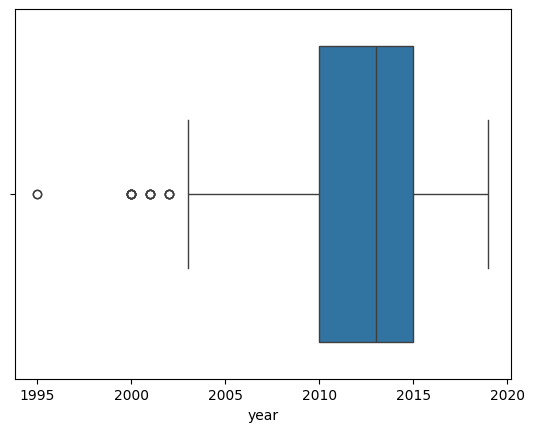

In [117]:
sns.boxplot(x=df['year'])

<Axes: xlabel='Price'>

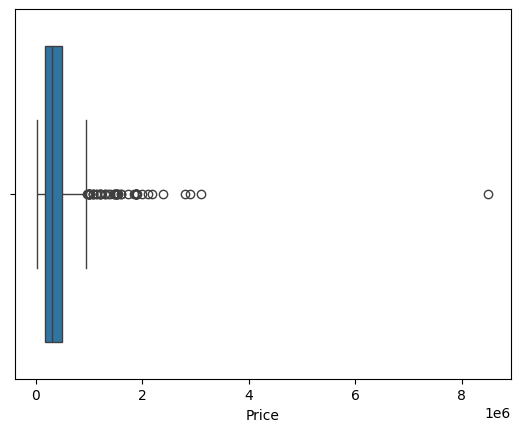

In [120]:
sns.boxplot(x=df['Price'])

In [119]:
df['Price']=df['Price'].astype(int)